# Development of a Star Classification - Algorithm Using Machine Learning Techniques

### Abstract:

The objective of this research project is to develop an efficient and accurate star classification
algorithm by leveraging various machine learning techniques. Utilizing a comprehensive dataset
containing detailed information about stars, such as spectral class, temperature, luminosity, radius,
and absolute magnitude. The project will involve data pre-processing, exploratory data analysis,
model selection and implementation, performance evaluation, optimization, and comparison of
various algorithms to identify the most effective model for star classification. Through this research,
we seek to enhance the accuracy and efficiency of star classification.

In [1]:
!git clone https://github.com/radhakrishnan-omotec/star-repo.git

fatal: destination path 'star-repo' already exists and is not an empty directory.


# 1. Imports and function definitions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import plotly.express as px
import plotly
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
input_df = pd.read_csv("/content/star-repo/input_6_class_csv.csv")
input_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
#Function used to add value labels to vertical barplots

def add_val_labels(plot, spacing=float(0.5)):
    for p in plot.patches:
        if not math.isnan(p.get_height()):
            x = p.get_x() + p.get_width()- float(0.45)
            y = p.get_height() - spacing
            value = round(p.get_height(), 1)
            plot.text(x, y, value, ha="left", color="black", size='large')

# **2. Data loading and exploration**

In [5]:
input_df.shape

(240, 7)

In [6]:
input_df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [7]:
input_df.head(-10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Red,M
1,3042,0.000500,0.1542,16.600,0,Red,M
2,2600,0.000300,0.1020,18.700,0,Red,M
3,2800,0.000200,0.1600,16.650,0,Red,M
4,1939,0.000138,0.1030,20.060,0,Red,M
...,...,...,...,...,...,...,...
225,18734,224780.000000,46.0000,-7.450,4,Blue,O
226,9892,593900.000000,80.0000,-7.262,4,Blue,O
227,10930,783930.000000,25.0000,-6.224,4,Blue,O
228,23095,347820.000000,86.0000,-5.905,4,Blue,O


In [8]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# **3.  Variable exploration**

In [9]:
# Debug: Check column names and the first few rows of the DataFrame
print("Column names:", input_df.columns)
print("First few rows of the DataFrame:\n", input_df.head())

# Strip any leading/trailing spaces in column names
input_df.columns = input_df.columns.str.strip()

# Verify that 'Type' column exists
if 'Type' in input_df.columns:
    # Create the count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(x="Type", data=input_df)
    plt.title("Type distribution", fontsize=20)
    plt.xlabel("Type", fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
else:
    print("The column 'Type' does not exist in the dataset.")

Column names: Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')
First few rows of the DataFrame:
    Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
The column 'Type' does not exist in the dataset.


In [10]:
print("Column names:", input_df.columns)

Column names: Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [11]:
print(input_df.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


In [12]:
input_df.columns = input_df.columns.str.strip()

In [13]:
for column in input_df.columns:
    print(f"'{column}'")

'Temperature (K)'
'Luminosity(L/Lo)'
'Radius(R/Ro)'
'Absolute magnitude(Mv)'
'Star type'
'Star color'
'Spectral Class'


In [14]:
print(input_df.columns)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


Unique star types: [0 1 2 3 4 5]


<ipython-input-15-aa65a24e083d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Star type", data=input_df, palette="coolwarm")


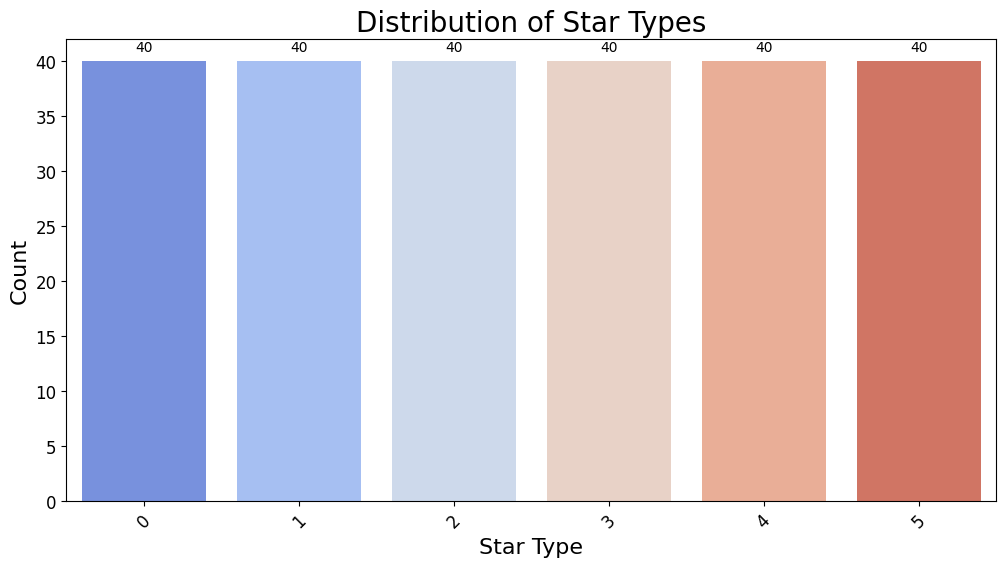

In [15]:
if 'Star type' in input_df.columns:
    print("Unique star types:", input_df['Star type'].unique())

    # Create the count plot for different star types
    plt.figure(figsize=(12, 6))
    plot = sns.countplot(x="Star type", data=input_df, palette="coolwarm")
    plt.title("Distribution of Star Types", fontsize=20)
    plt.xlabel("Star Type", fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    # Add value labels on top of bars
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

    plt.show()
else:
    print("The column 'Star type' does not exist in the dataset.")

In [16]:
numerical_columns = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]
input_df_vars_num = input_df[numerical_columns]
print("Description of numerical variables:\n", input_df_vars_num.describe())

Description of numerical variables:
        Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
count       240.000000        240.000000    240.000000              240.000000
mean      10497.462500     107188.361635    237.157781                4.382396
std        9552.425037     179432.244940    517.155763               10.532512
min        1939.000000          0.000080      0.008400              -11.920000
25%        3344.250000          0.000865      0.102750               -6.232500
50%        5776.000000          0.070500      0.762500                8.313000
75%       15055.500000     198050.000000     42.750000               13.697500
max       40000.000000     849420.000000   1948.500000               20.060000


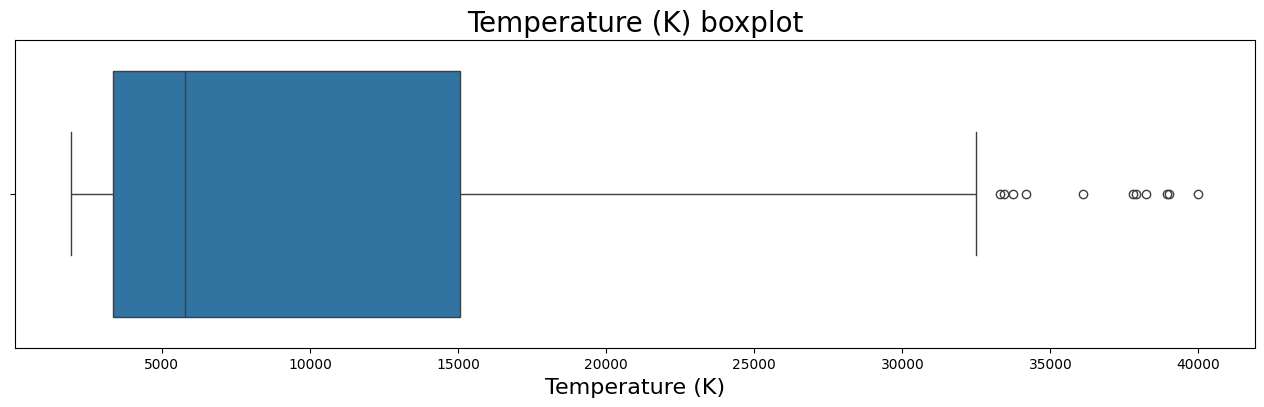

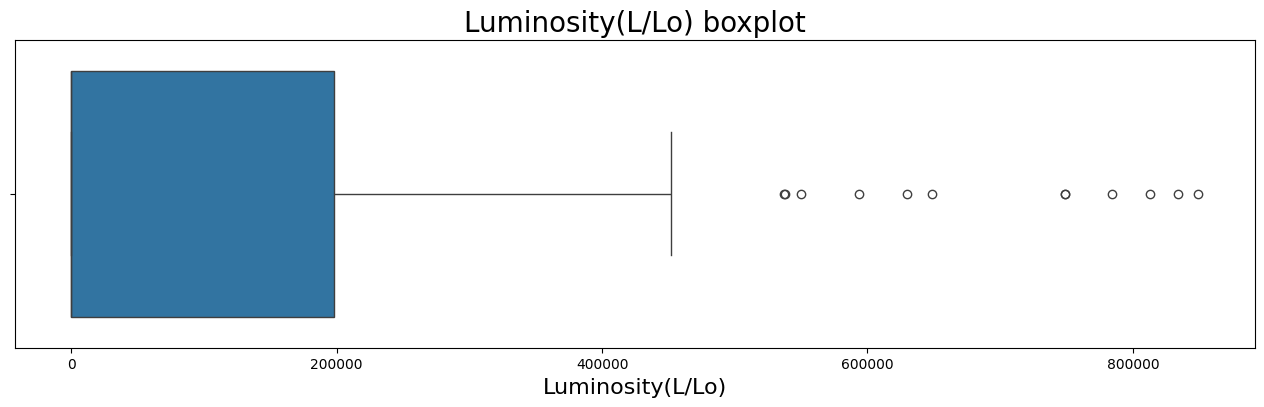

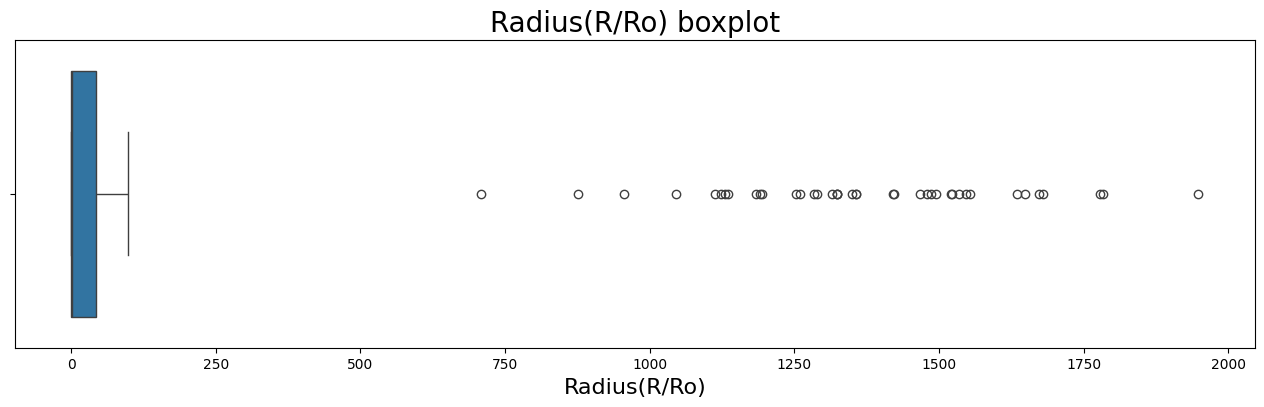

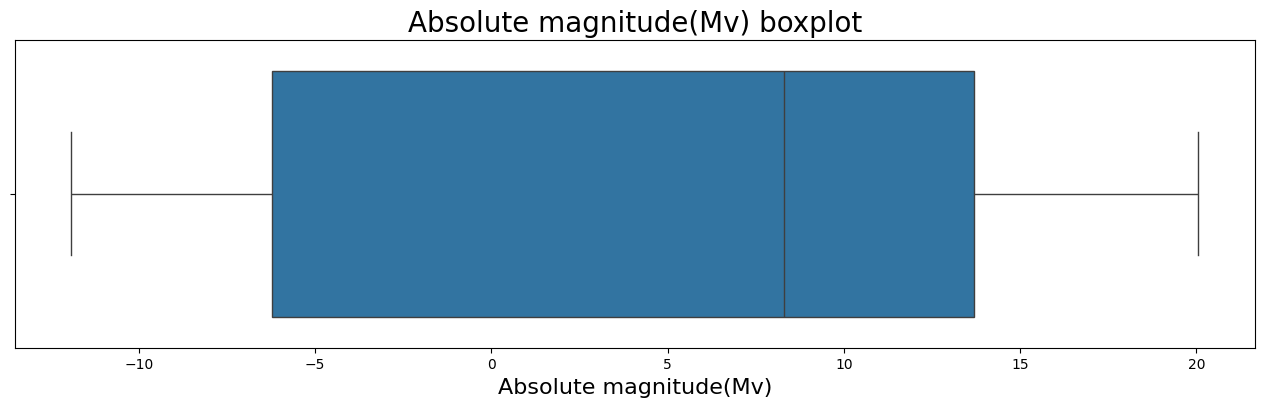

In [17]:
for col_name in input_df_vars_num:
    plt.figure(figsize=(16, 4))
    sns.boxplot(x=input_df_vars_num[col_name])
    plt.title(col_name+ " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.xticks(fontsize=10)
    plt.show()

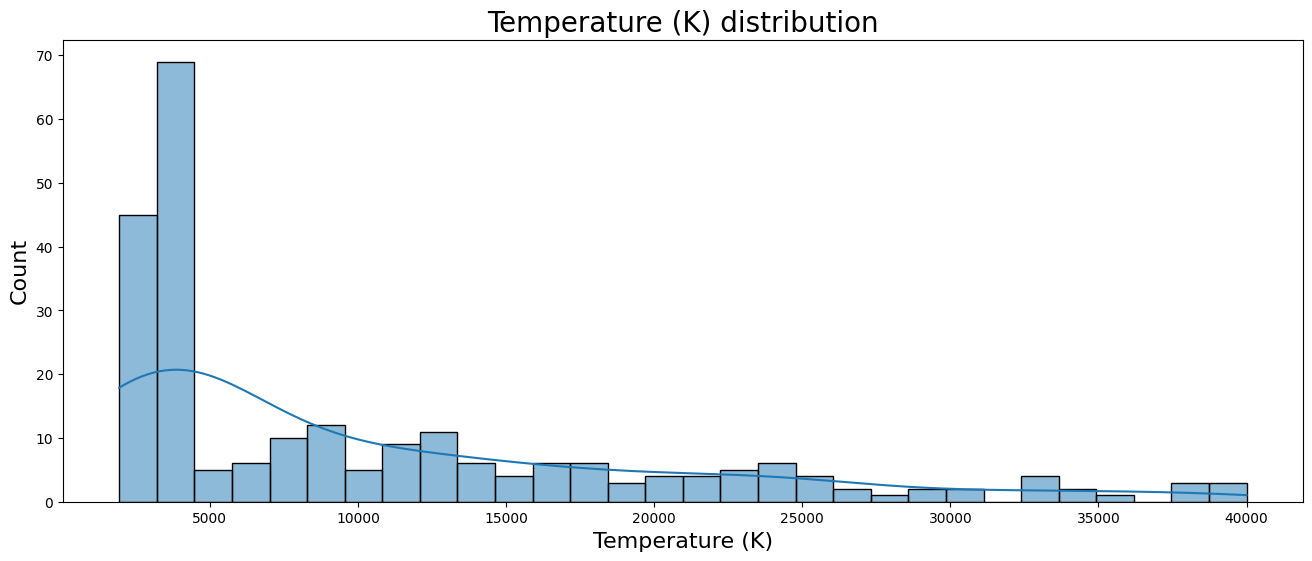

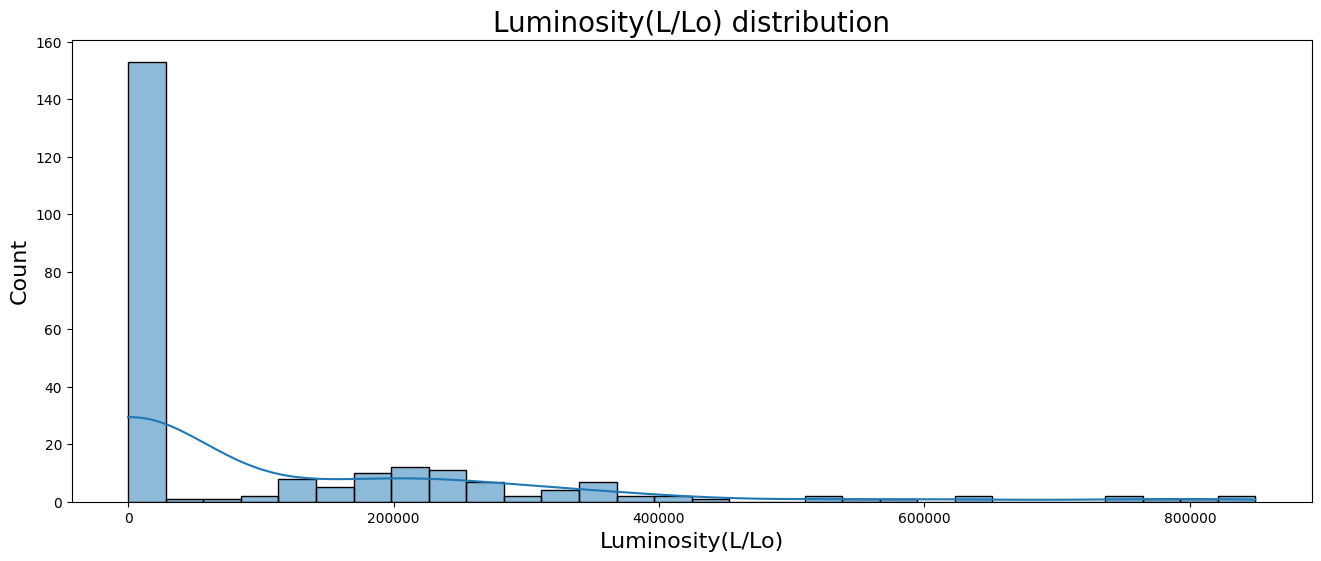

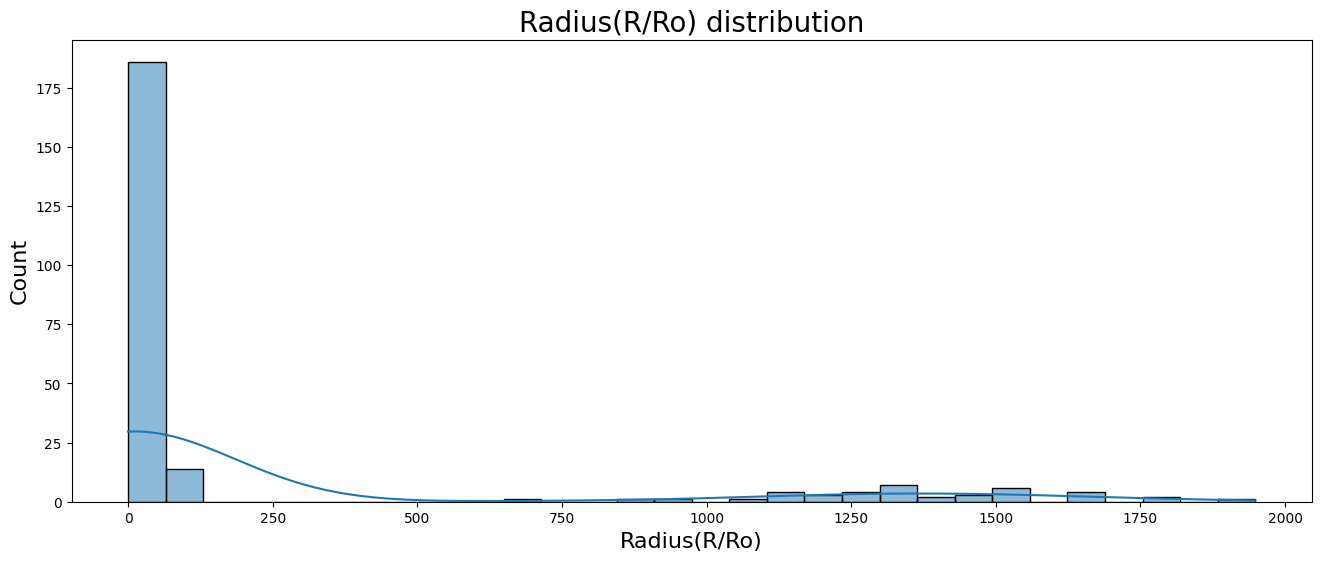

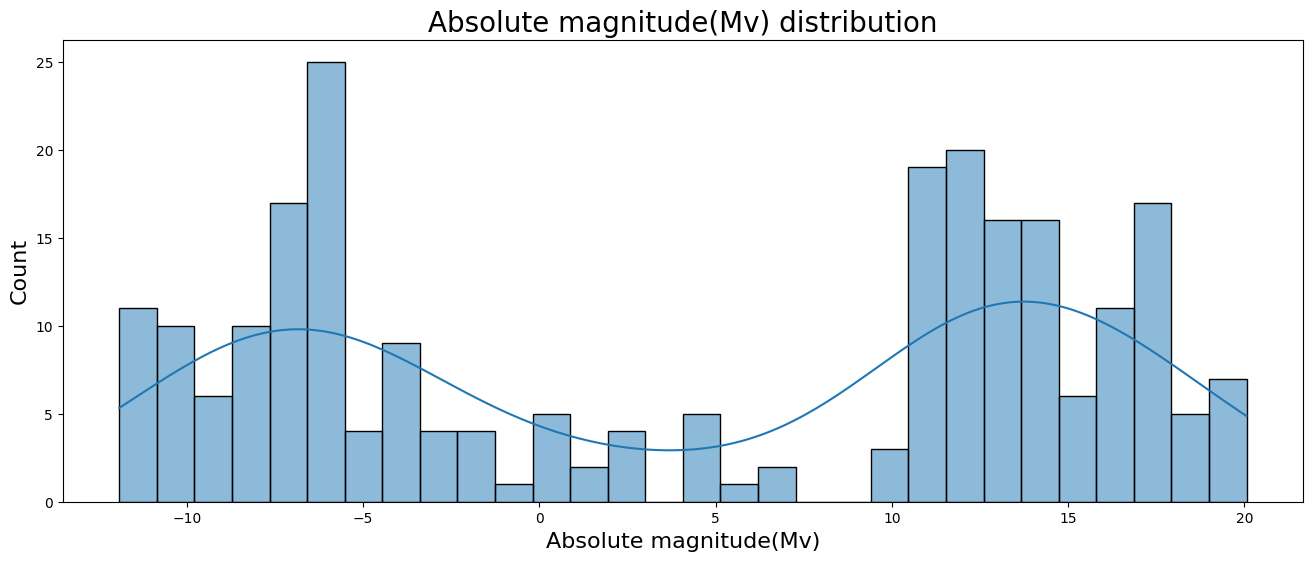

In [18]:
for col_name in input_df_vars_num:
    plt.figure(figsize=(16, 6))
    sns.histplot(x=col_name, kde=True, bins=30, data=input_df_vars_num)
    plt.title(col_name+ " distribution", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

<ipython-input-19-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


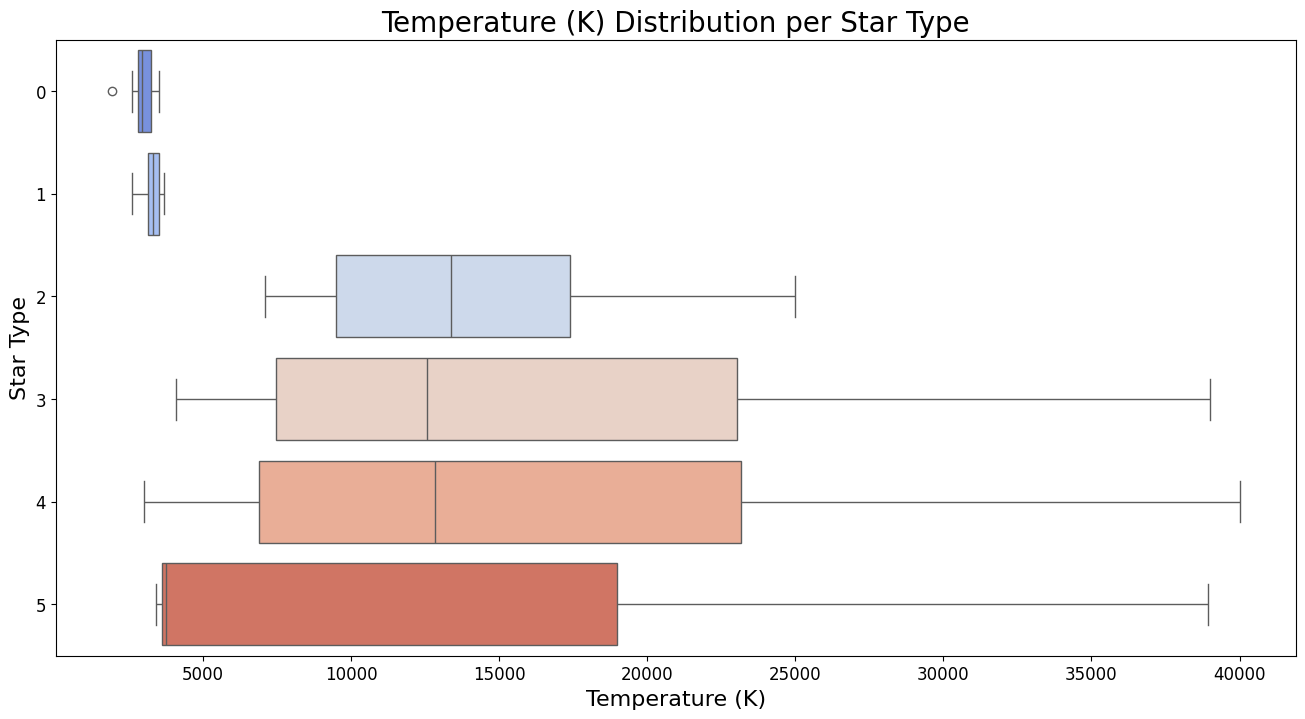

<ipython-input-19-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


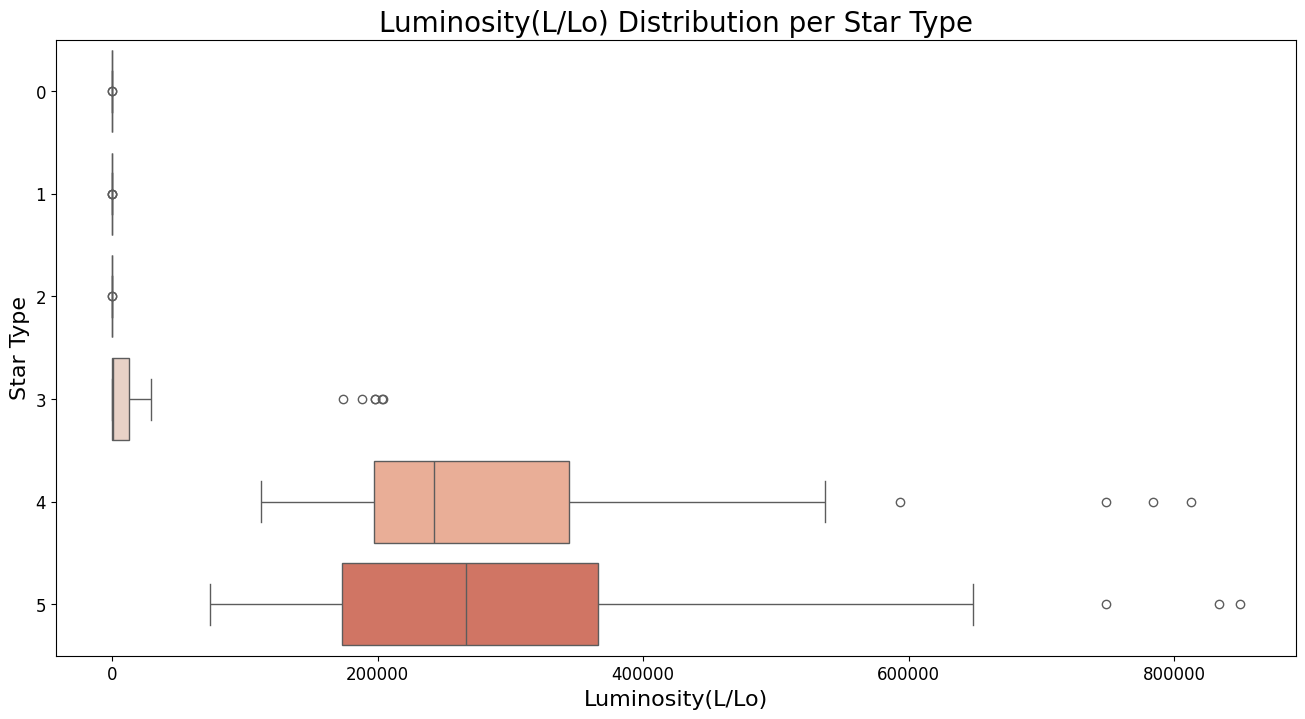

<ipython-input-19-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


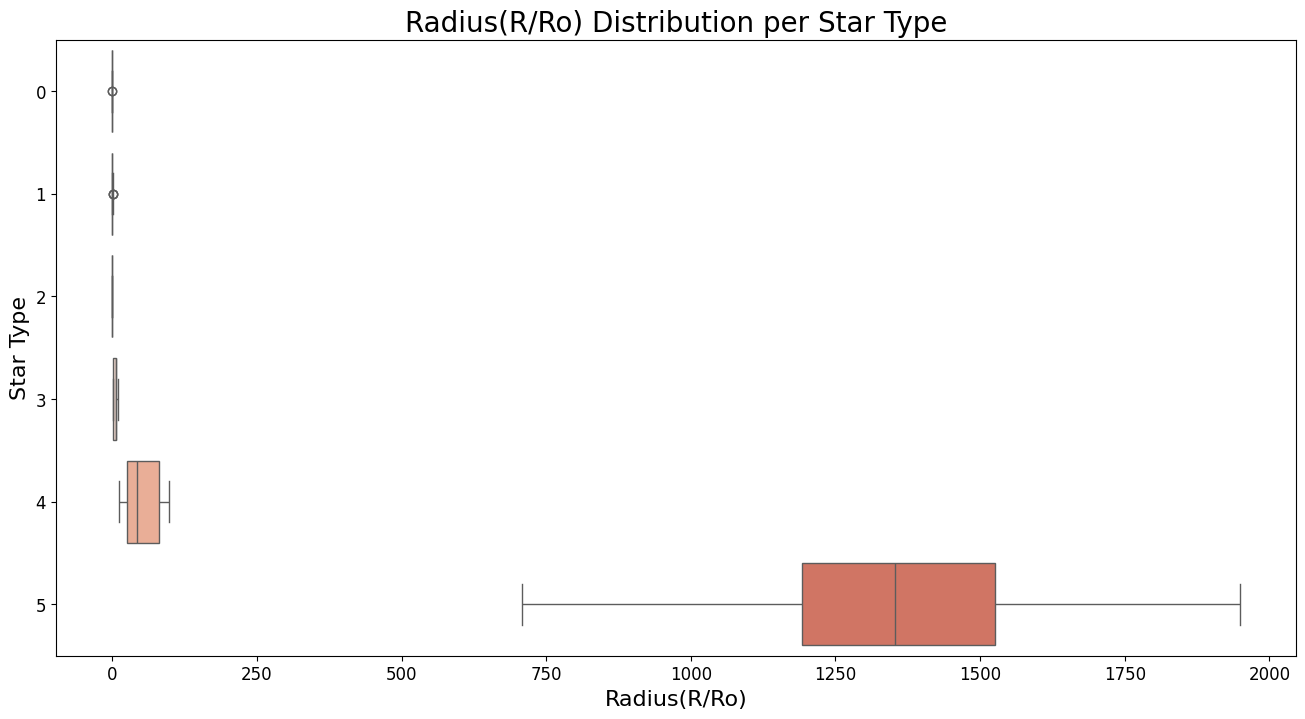

<ipython-input-19-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


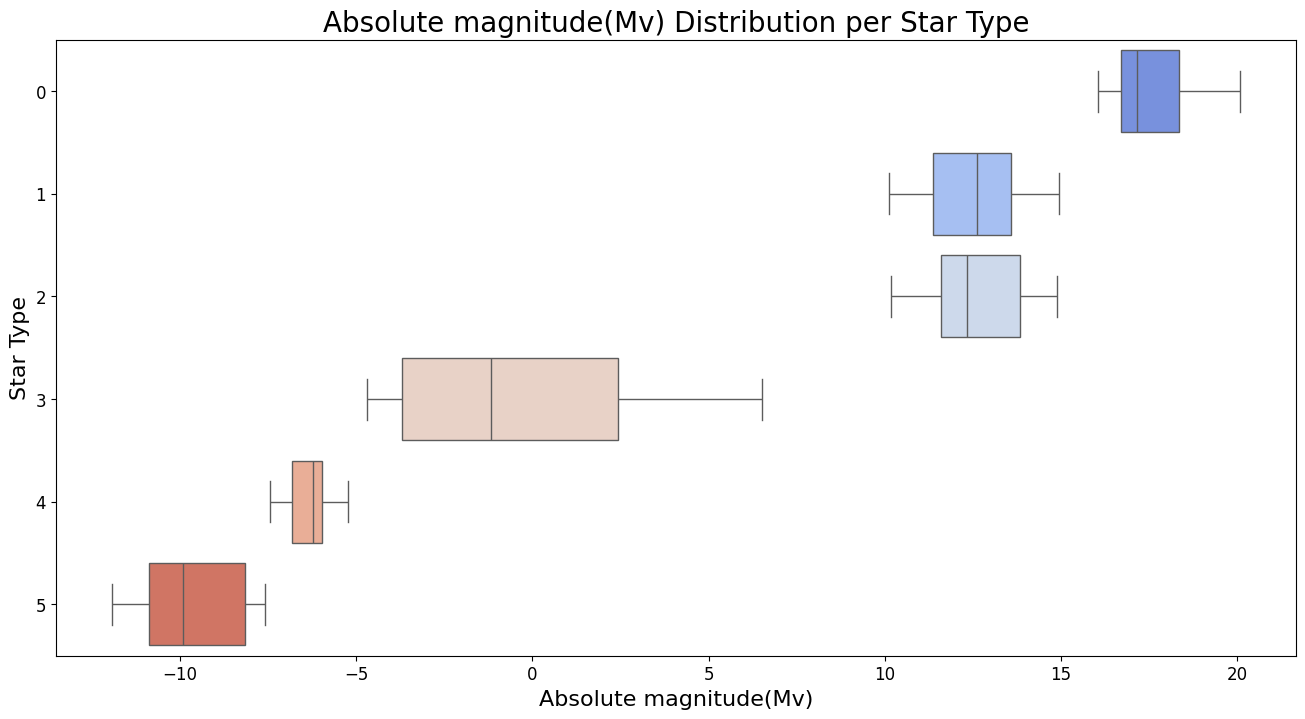

In [19]:
# Plot boxplots for each numerical variable against Star type
for col_name in input_df_vars_num.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")
    plt.title(col_name + " Distribution per Star Type", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Star Type", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [20]:
# Select categorical variables (assuming these are the correct column names)
categorical_columns = ["Star color", "Spectral Class"]
input_df_vars_cat = input_df[categorical_columns]

# Describe categorical variables
cat_description = input_df_vars_cat.describe()

# Display description
print("Description of Categorical Variables:")
print(cat_description)

Description of Categorical Variables:
       Star color Spectral Class
count         240            240
unique         19              7
top           Red              M
freq          112            111


In [21]:
# Check for the presence of 'Star color' column
if 'Star color' in input_df.columns:
    unique_colors = input_df['Star color'].unique()
    print("Unique colors:", unique_colors)
else:
    print("The column 'Star color' does not exist in the dataset.")

Unique colors: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']


In [22]:
remap_dict = {
    'Red': 'Red',
    'Blue White': 'Blue-White',
    'White': 'White',
    'Yellowish White': 'White-Yellow',
    'Blue white': 'Blue-White',
    'Pale yellow orange': 'Yellow-Orange',
    'Blue': 'Blue',
    'Blue-white': 'Blue-White',
    'Whitish': 'White',
    'yellow-white': 'White-Yellow',
    'Orange': 'Orange',
    'White-Yellow': 'White-Yellow',
    'white': 'White',
    'yellowish': 'Yellow',
    'Yellowish': 'Yellow',
    'Orange-Red': 'Orange-Red',
    'Blue-White': 'Blue-White'
}

input_df["Color_name"] = input_df["Star color"].map(remap_dict)
input_df["Color_name"].unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Yellow-Orange',
       'Blue', 'Orange', nan, 'Yellow', 'Orange-Red'], dtype=object)

<ipython-input-23-dd36ea5d9e73>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Color_name", data=input_df,


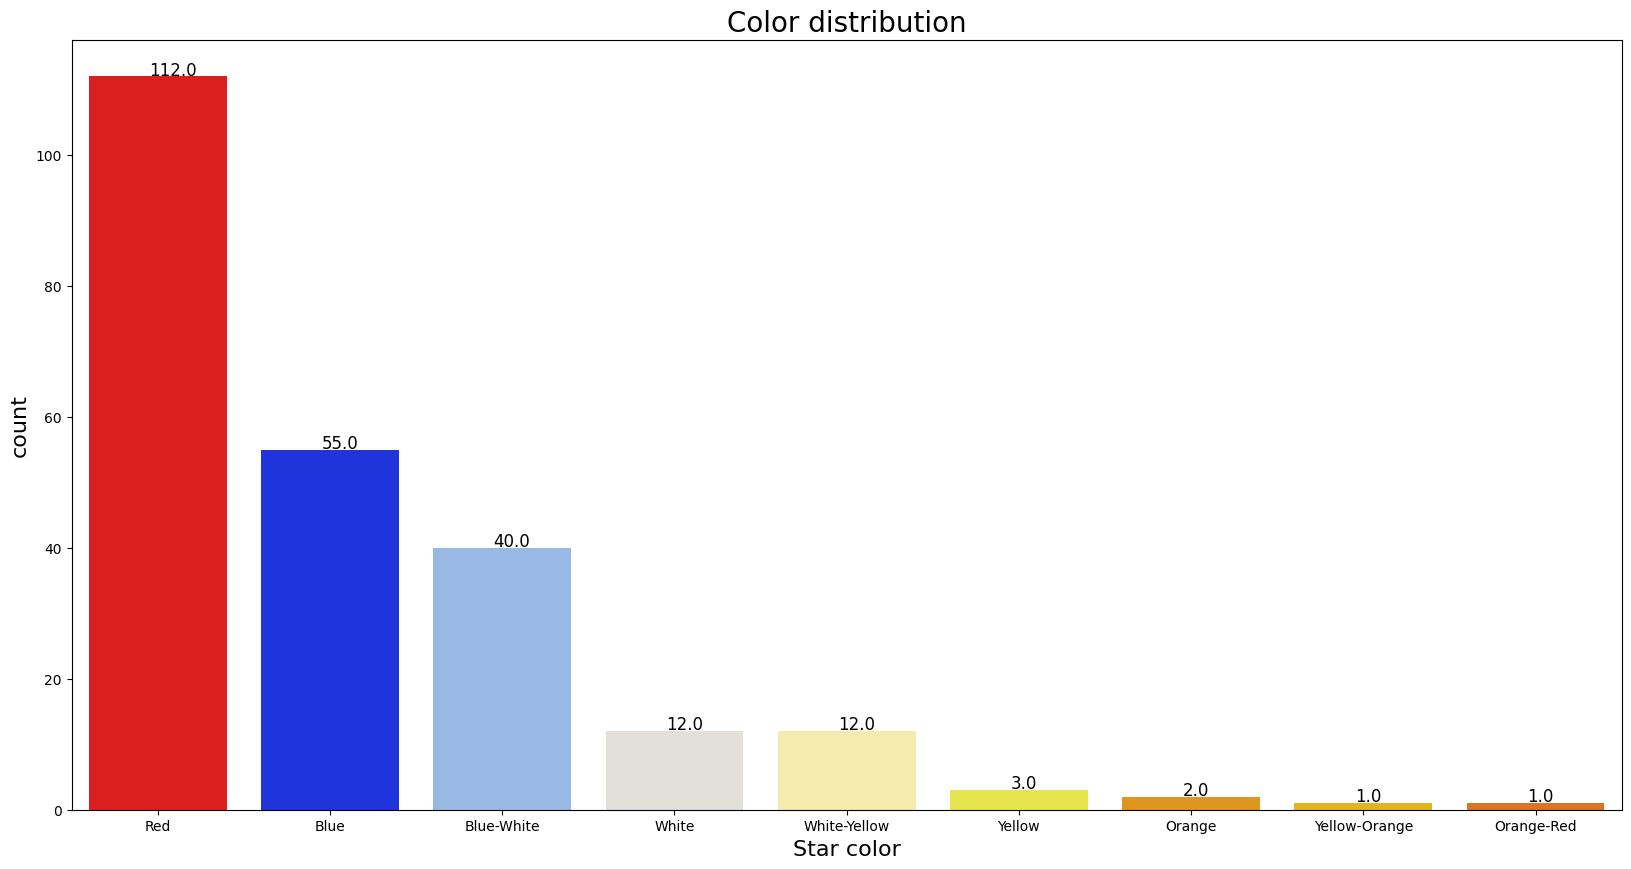

In [23]:
plt.figure(figsize=(20, 10))
palette = {"Red": "#fa0000", "Blue": "#001dfa", "Blue-White": "#8bb7f0", "White": "#e3e1d8",
           "White-Yellow": "#fff6a1", "Yellow": "#fffc36", "Orange": "#ff9d00", "Orange-Red": "#ff6f00",
           "Yellow-Orange": "#ffc800"}
plot = sns.countplot(x="Color_name", data=input_df,
              order=input_df["Color_name"].value_counts().index, palette=palette)
plt.title("Color distribution", fontsize=20)
plt.xlabel("Star color", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
add_val_labels(plot, spacing=float(-0.2))
plt.show()

In [24]:
remap_dict_2 = {
    "Red": 0,
    "Orange-Red": 1,
    "Orange": 2,
    "Yellow-Orange": 3,
    "Yellow": 4,
    "White-Yellow": 5,
    "White": 6,
    "Blue-White": 7,
    "Blue": 8
}

input_df["Star color"] = input_df["Color_name"].map(remap_dict_2)
input_df["Star color"].unique()

array([ 0.,  7.,  6.,  5.,  3.,  8.,  2., nan,  4.,  1.])

In [25]:
input_df["Spectral Class"].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

<ipython-input-26-c434b00889d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Spectral Class", data=input_df,


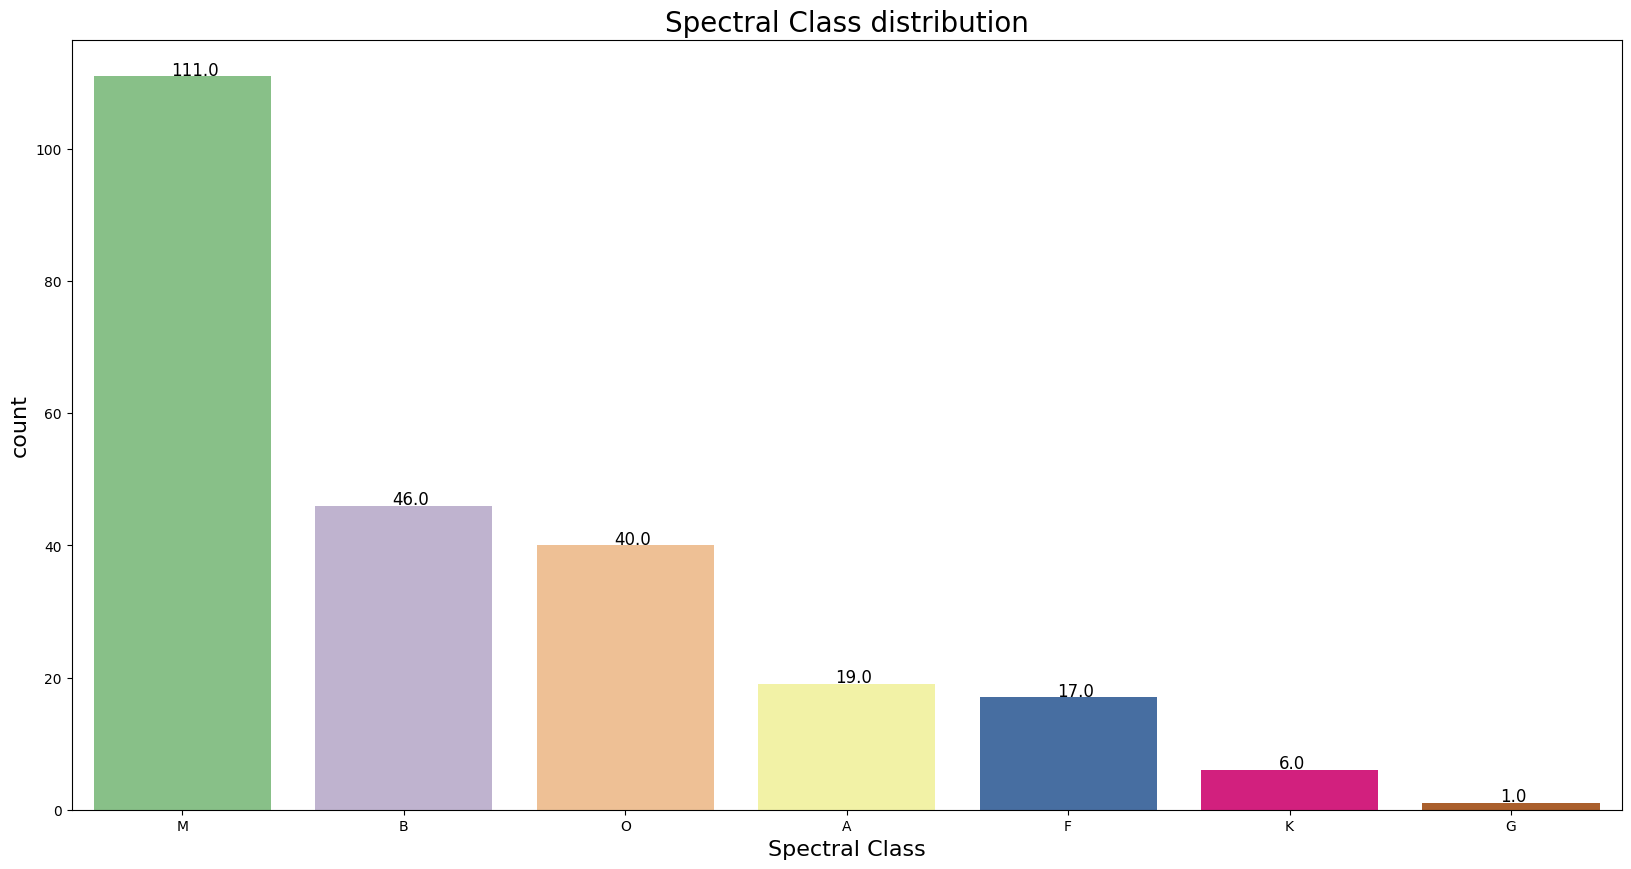

In [26]:
plt.figure(figsize=(20, 10))
plot = sns.countplot(x="Spectral Class", data=input_df,
              order=input_df['Spectral Class'].value_counts().index, palette="Accent")
plt.title("Spectral Class distribution", fontsize=20)
plt.xlabel("Spectral Class", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
add_val_labels(plot, spacing=float(-0.2))
plt.show()

In [27]:
input_df["Spectral_Class_name"] = input_df["Spectral Class"]

remap_dict_3 = {
    "M": 0,
    "K": 1,
    "G": 2,
    "F": 3,
    "A": 4,
    "B": 5,
    "O": 6
}

input_df["Spectral Class"] = input_df["Spectral_Class_name"].map(remap_dict_3)
input_df["Spectral Class"].unique()

array([0, 5, 4, 3, 6, 1, 2])

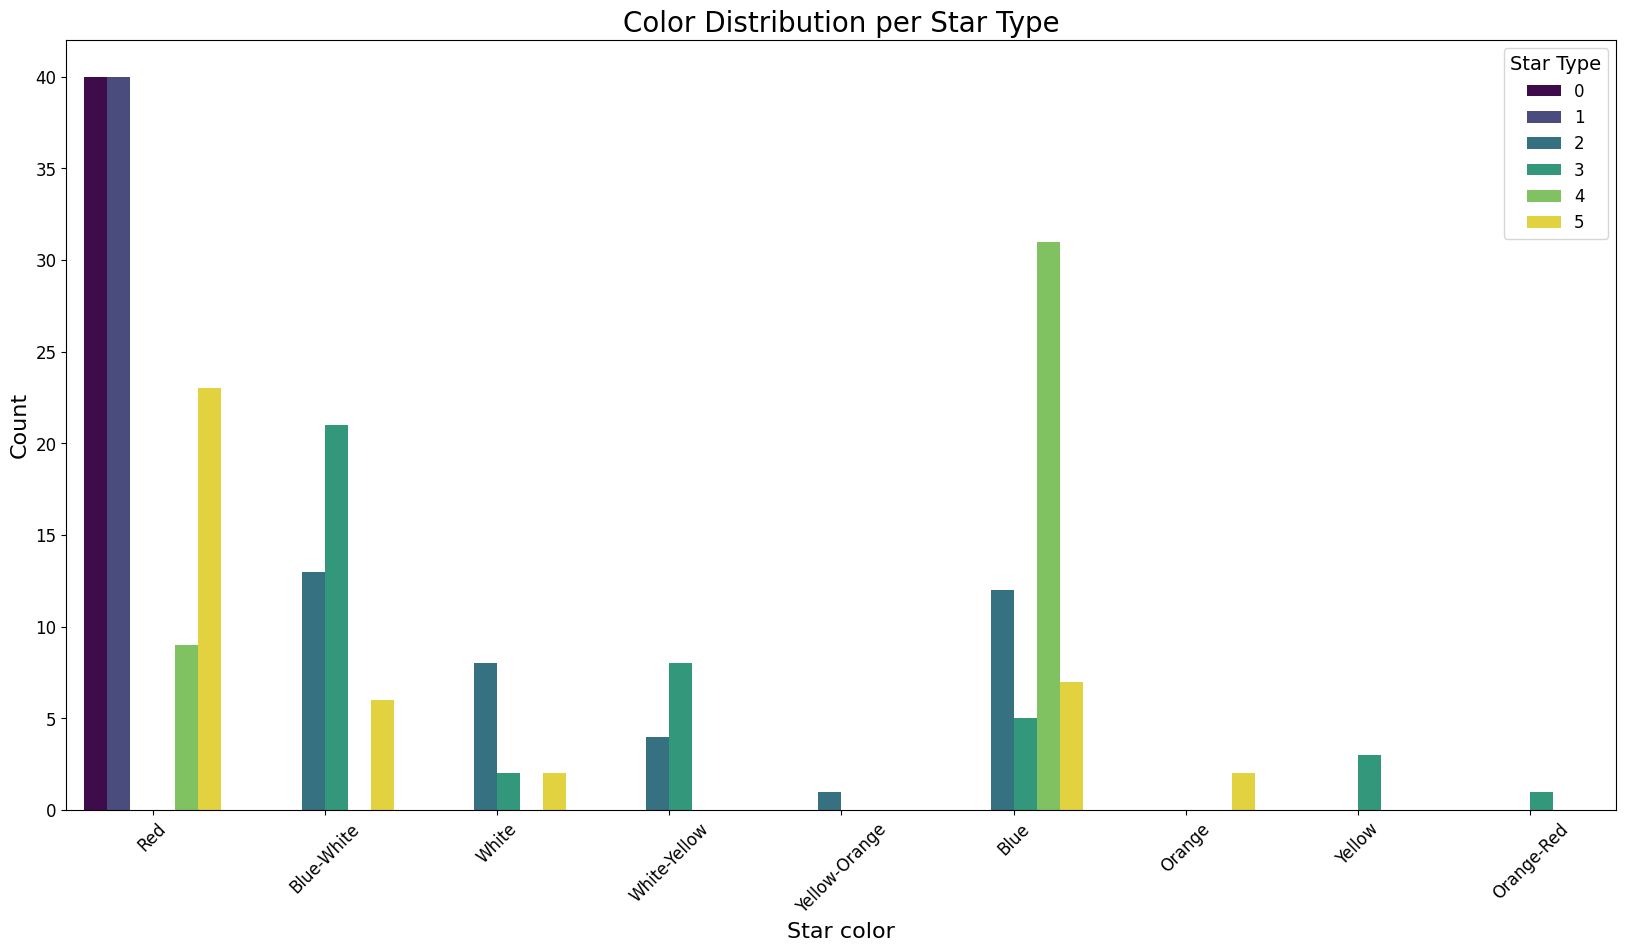

In [28]:
# Plot count plot for color distribution by star type
plt.figure(figsize=(20, 10))
sns.countplot(x="Color_name", hue="Star type", data=input_df, palette="viridis")
plt.title("Color Distribution per Star Type", fontsize=20)
plt.xlabel("Star color", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Star Type", fontsize=12, title_fontsize=14)
plt.show()

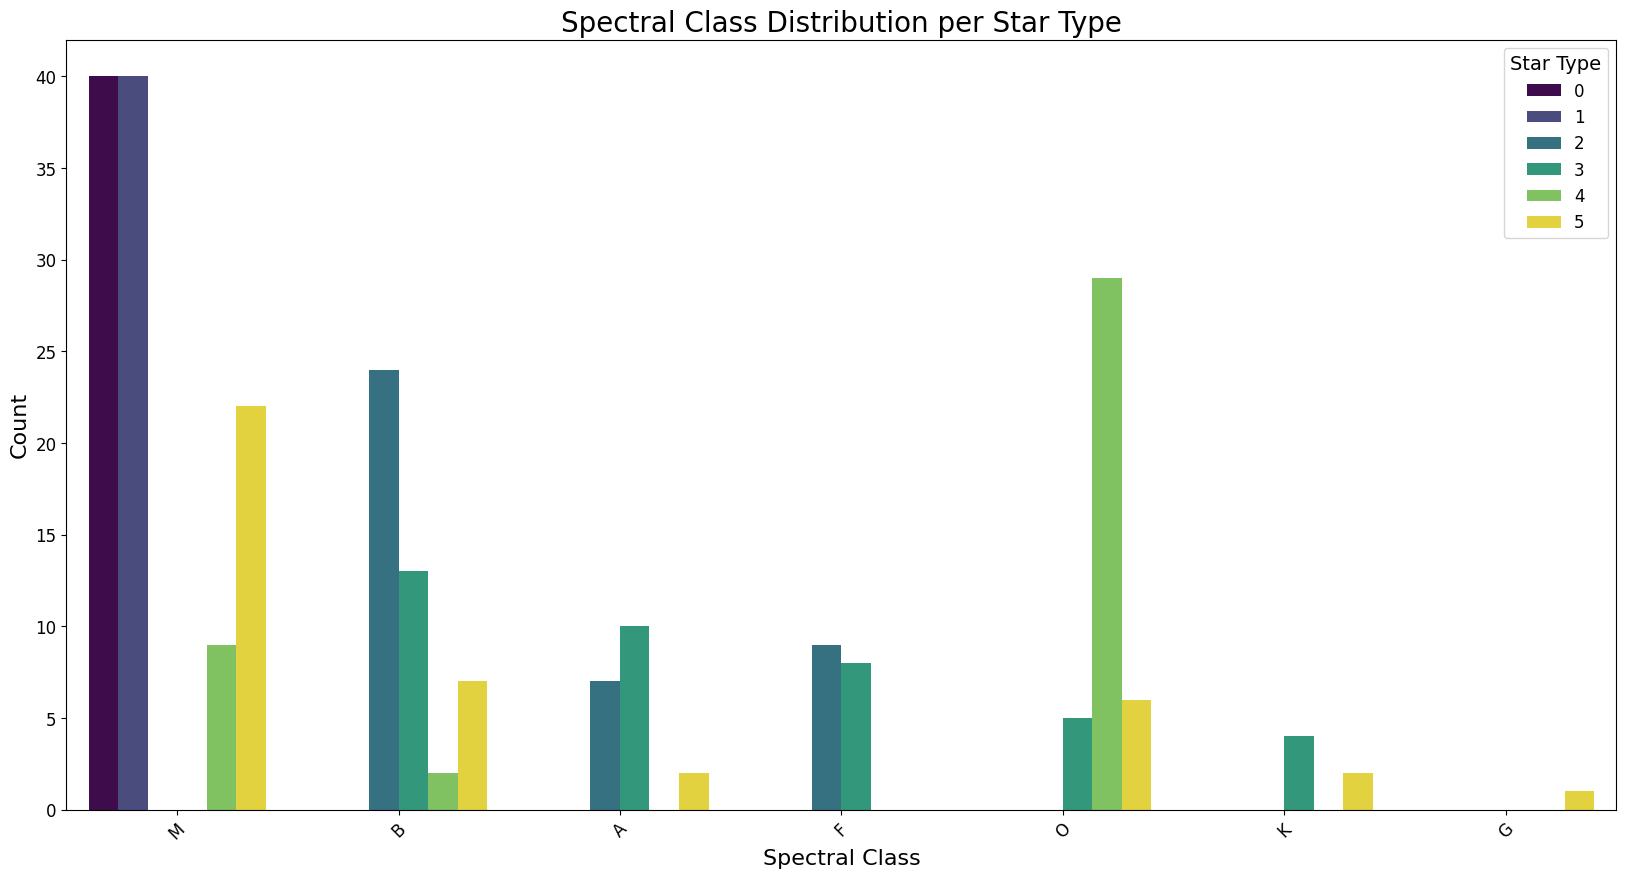

In [29]:
# Plot count plot for Spectral Class distribution by Type
plt.figure(figsize=(20, 10))
sns.countplot(x="Spectral_Class_name", hue="Star type", data=input_df, palette="viridis")
plt.title("Spectral Class Distribution per Star Type", fontsize=20)
plt.xlabel("Spectral Class", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Star Type", fontsize=12, title_fontsize=14)
plt.show()

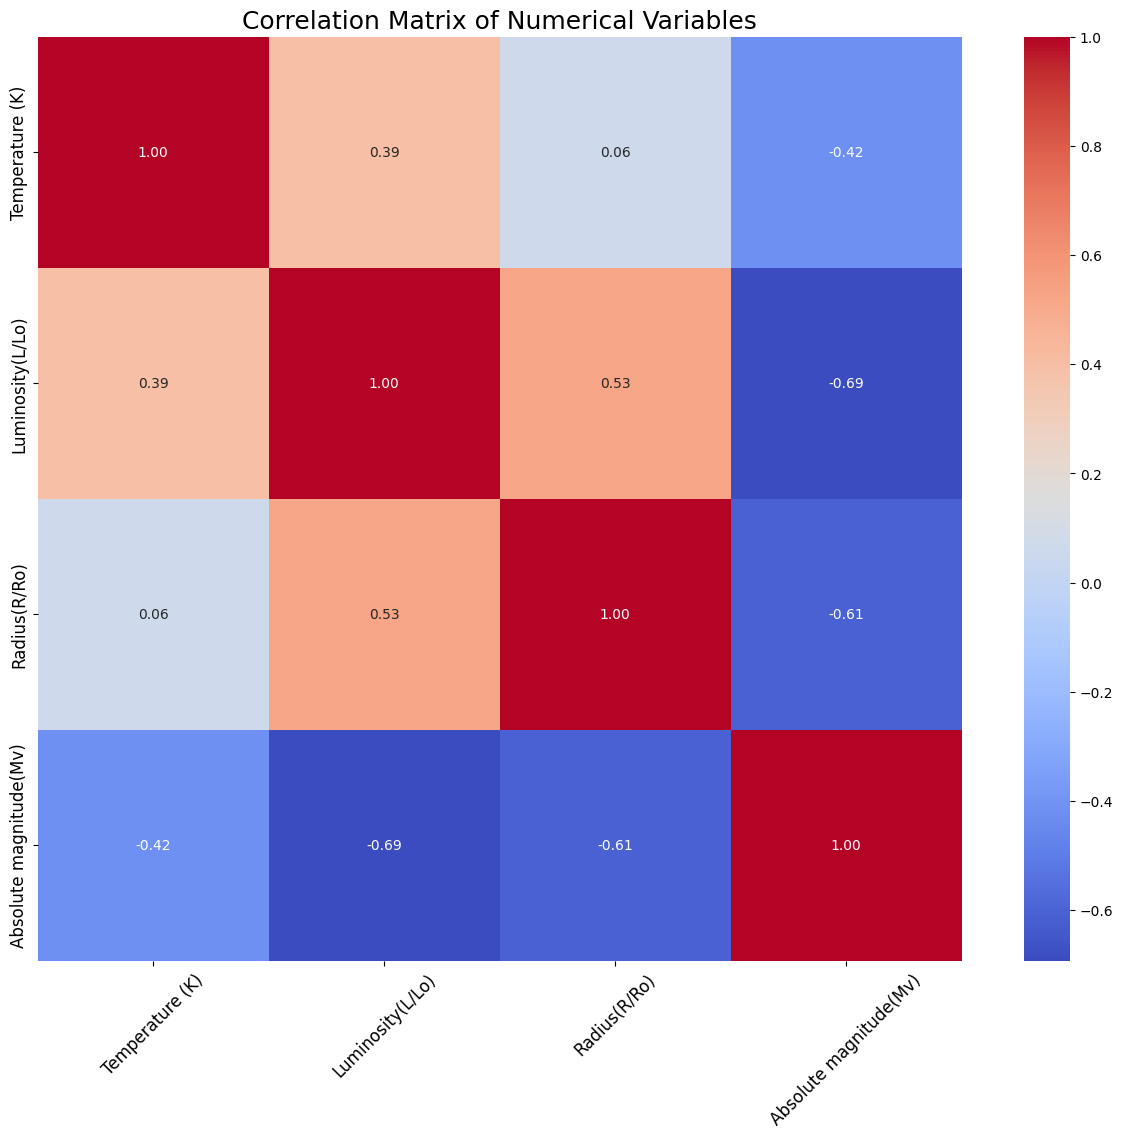

In [30]:
# Select numerical columns for correlation
numerical_columns = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]
input_df_numerical = input_df[numerical_columns]
# Compute correlations
correlations = input_df_numerical.corr()
# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, square=True, annot=True, fmt='.2f', cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 1600x1600 with 0 Axes>

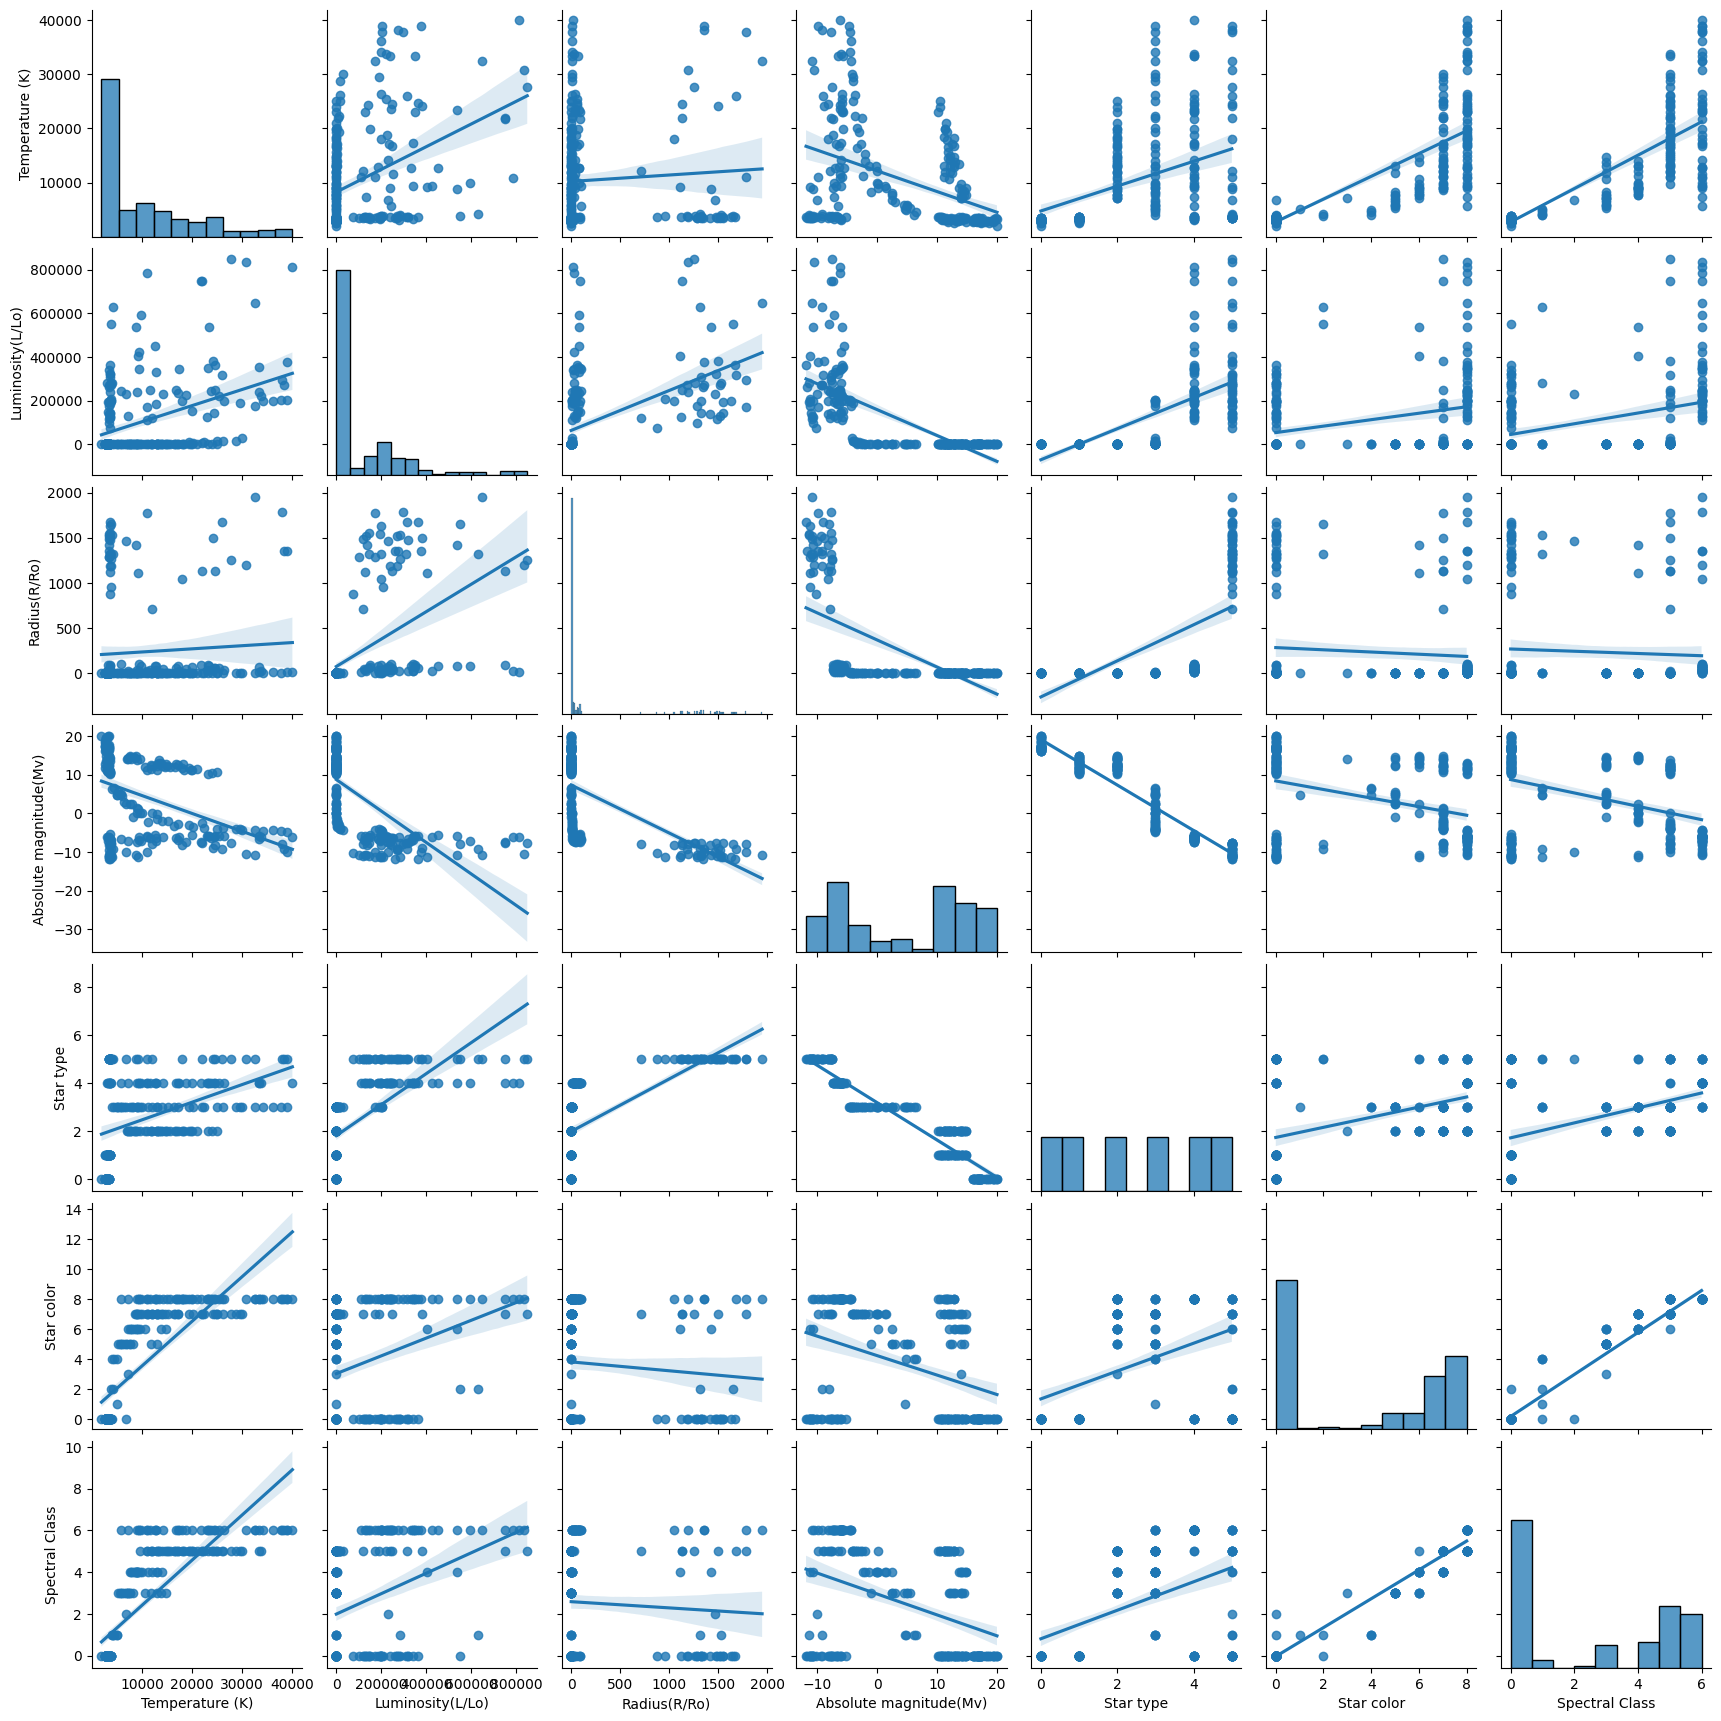

In [31]:
plt.figure(figsize=(16, 16))
sns.pairplot(input_df, kind='reg', diag_kind='hist', palette='Rainbow')
plt.show()

# **4.  Final feature engineering**

In [32]:
# Adjust drop operation based on actual column names
columns_to_drop = ["Color", "Spectral Class"]  # Replace with actual column names if different

# Drop columns if they exist
input_df = input_df.drop(columns_to_drop, axis=1, errors='ignore')

# Display the first few rows of the updated DataFrame
input_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Color_name,Spectral_Class_name
0,3068,0.002400,0.1700,16.12,0,0.0,Red,M
1,3042,0.000500,0.1542,16.60,0,0.0,Red,M
2,2600,0.000300,0.1020,18.70,0,0.0,Red,M
3,2800,0.000200,0.1600,16.65,0,0.0,Red,M
4,1939,0.000138,0.1030,20.06,0,0.0,Red,M


In [33]:
y = input_df["Star type"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Star type, dtype: int64

In [34]:
X = input_df.drop(["Star type"], axis=1)
X.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Color_name,Spectral_Class_name
0,3068,0.002400,0.1700,16.12,0.0,Red,M
1,3042,0.000500,0.1542,16.60,0.0,Red,M
2,2600,0.000300,0.1020,18.70,0.0,Red,M
3,2800,0.000200,0.1600,16.65,0.0,Red,M
4,1939,0.000138,0.1030,20.06,0.0,Red,M


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(144, 7) (96, 7) (144,) (96,)


# **5. Model training**

In [36]:
!pip install scikit-learn

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined

# Create a sample DataFrame to illustrate
# Replace this with your actual dataset
# X_train = pd.DataFrame({...})
# X_test = pd.DataFrame({...})

# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformers
num_transformer = SimpleImputer(strategy='mean')
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Create a pipeline with preprocessing and classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

# Fit the model with the pipeline
clf.fit(X_train, y_train)

# Predict using the model
y_pred = clf.predict(X_test)

# Calculate accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForestClassifier after imputation and encoding:", score)


Accuracy of RandomForestClassifier after imputation and encoding: 0.9583333333333334


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=47)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(144, 7) (96, 7) (144,) (96,)


In [40]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined

# Sample data for illustration; replace with your actual data
# X_train = pd.DataFrame({...})
# X_test = pd.DataFrame({...})
# y_train = ...
# y_test = ...

# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformers
num_transformer = SimpleImputer(strategy='mean')
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Create a pipeline with preprocessing and classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

# Fit the model with the pipeline
clf.fit(X_train, y_train)

# Predict using the model
y_pred = clf.predict(X_test)

# Calculate accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForestClassifier after imputation and encoding:", score)


Accuracy of RandomForestClassifier after imputation and encoding: 0.9791666666666666


<ipython-input-41-6cdc08276f9b>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="CMRmap")


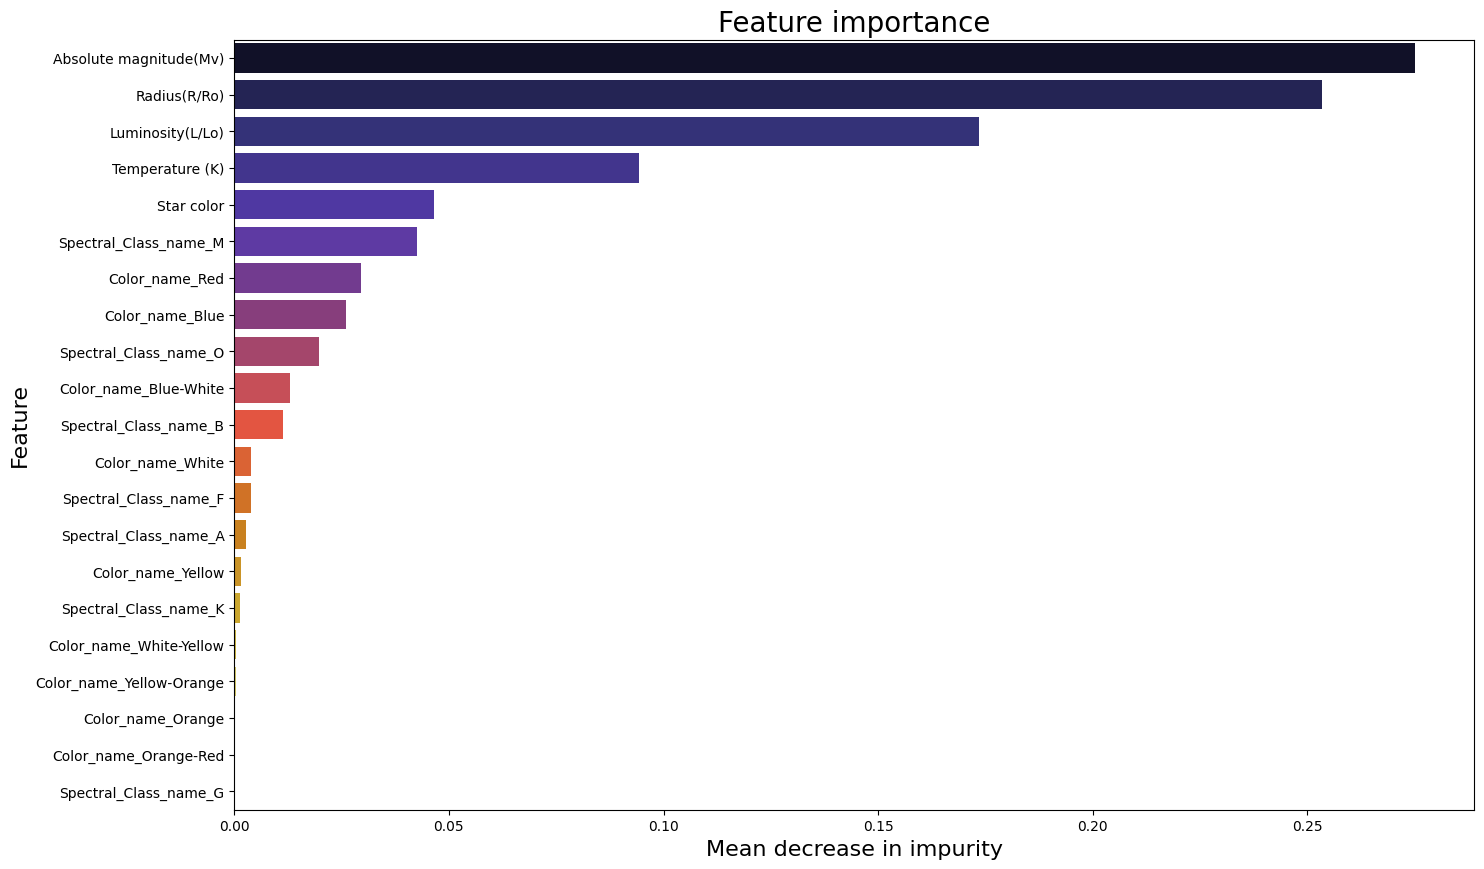

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are defined

# Sample data for illustration; replace with your actual data
# X_train = pd.DataFrame({...})
# X_test = pd.DataFrame({...})
# y_train = ...
# y_test = ...

# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformers
num_transformer = SimpleImputer(strategy='mean')
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Create a pipeline with preprocessing and classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

# Fit the pipeline
clf.fit(X_train, y_train)

# Extract the RandomForestClassifier from the pipeline
rfc_model = clf.named_steps['classifier']

# Transform X_train to get the correct feature names
X_train_transformed = clf.named_steps['preprocessor'].transform(X_train)

# Get feature names after transformation
if cat_cols:
    cat_transformer = clf.named_steps['preprocessor'].named_transformers_['cat']
    cat_feature_names = cat_transformer.named_steps['onehot'].get_feature_names_out(cat_cols)
    feature_names = np.append(num_cols, cat_feature_names)
else:
    feature_names = num_cols

# Create a Series for feature importances
feature_importance = pd.Series(rfc_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(16, 10))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="CMRmap")
plt.title("Feature importance", fontsize=20)
plt.xlabel("Mean decrease in impurity", fontsize=16)
plt.ylabel("Feature", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# **5. Data Visualization**

In [42]:
col = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)']

for column in col:
    fig = px.box(input_df, x=column, color='Star type')
    fig.update_layout(title=f'Boxplot of {column} by Star type', xaxis_title=column)
    fig.show()


In [43]:
col = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color']

for column in col:
    if column in input_df.columns:
        fig = px.histogram(input_df, x=column, color='Star type', template='plotly_white', opacity=0.7)
        fig.update_layout(title=f'Histogram of {column} by Star type', xaxis_title=column)
        fig.show()
    else:
        print(f"Column '{column}' not found in input_df.")

In [44]:
def tempVdf(x):
    if x in input_df.columns:
        fig = px.histogram(input_df, x=x, title=f'Histogram of {x}')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Luminosity(L/Lo)", title=f'{x} vs Luminosity(L/Lo)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Radius(R/Ro)", title=f'{x} vs Radius(R/Ro)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Absolute magnitude(Mv)', title=f'{x} vs Absolute magnitude(Mv)')
        fig.show()

        fig = px.pie(input_df, names='Star type', values=x, title=f'{x} vs Star Type', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        fig = px.pie(input_df, names='Star color', values=x, title=f'{x} vs Star color', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        if 'Spectral Class' in input_df.columns:
            fig = px.pie(input_df, names='Spectral Class', values=x, title=f'{x} vs Spectral Class', hole=0.4, opacity=0.6)
            fig.update_traces(textposition='outside', textinfo='percent+label')
            fig.show()
        else:
            print("Column 'Spectral Class' not found in input_df.")
    else:
        print(f"Column '{x}' not found in input_df.")

# Example usage:
tempVdf("Temperature (K)")

Column 'Spectral Class' not found in input_df.


In [45]:

def lumVdf(x):
    if x in input_df.columns:
        fig = px.histogram(input_df, x=x, title=f'Histogram of {x}')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Temperature (K)", title=f'{x} vs Temperature (K)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Radius(R/Ro)", title=f'{x} vs Radius(R/Ro)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Absolute magnitude(Mv)', title=f'{x} vs Absolute magnitude(Mv)')
        fig.show()

        fig = px.pie(input_df, names='Star type', values=x, title=f'{x} vs Star Type', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        fig = px.pie(input_df, names='Star color', values=x, title=f'{x} vs Star color', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        if 'Spectral Class' in input_df.columns:
            fig = px.pie(input_df, names='Spectral Class', values=x, title=f'{x} vs Spectral Class', hole=0.4, opacity=0.6)
            fig.update_traces(textposition='outside', textinfo='percent+label')
            fig.show()
        else:
            print("Column 'Spectral Class' not found in input_df.")
    else:
        print(f"Column '{x}' not found in input_df.")

# Example usage:
lumVdf("Luminosity(L/Lo)")


Column 'Spectral Class' not found in input_df.


In [46]:
def radVdf(x):
    if x in input_df.columns:
        fig = px.histogram(input_df, x=x, title='Radius (R/Ro)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Temperature (K)", title='Radius (R/Ro) VS Temperature (K)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Luminosity(L/Lo)", title='Radius(R/Ro) VS Luminosity(L/Lo)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Absolute magnitude(Mv)', title='Radius (R/Ro) VS Absolute magnitude(Mv)')
        fig.show()

        fig = px.pie(input_df, names='Star type', values=x, title="Radius (R/Ro) VS Star Type", hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        fig = px.pie(input_df, names='Star color', values=x, title="Radius (R/Ro) VS Star color", hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        if 'Spectral Class' in input_df.columns:
            fig = px.pie(input_df, names='Spectral Class', values=x, title="Radius (R/Ro) VS Spectral Class", hole=0.4, opacity=0.6)
            fig.update_traces(textposition='outside', textinfo='percent+label')
            fig.show()
        else:
            print("Column 'Spectral Class' not found in input_df.")
    else:
        print(f"Column '{x}' not found in input_df.")

# Example usage:
radVdf("Radius(R/Ro)")


Column 'Spectral Class' not found in input_df.


In [47]:

def amVdf(x):
    if x in input_df.columns:
        fig = px.histogram(input_df, x=x, title='Absolute magnitude(Mv)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Temperature (K)", title='Absolute magnitude(Mv) VS Temperature (K)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Luminosity(L/Lo)", title='Absolute magnitude(Mv) VS Luminosity(L/Lo)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Radius(R/Ro)', title='Absolute magnitude(Mv) VS Radius(R/Ro)')
        fig.show()

        fig = px.pie(input_df, names='Star type', values=x, title="Absolute magnitude(Mv) VS Star Type", hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        fig = px.pie(input_df, names='Star color', values=x, title="Absolute magnitude(Mv) VS Star color", hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        if 'Spectral Class' in input_df.columns:
            fig = px.pie(input_df, names='Spectral Class', values=x, title="Absolute magnitude(Mv) VS Spectral Class", hole=0.4, opacity=0.6)
            fig.update_traces(textposition='outside', textinfo='percent+label')
            fig.show()
        else:
            print("Column 'Spectral Class' not found in input_df.")
    else:
        print(f"Column '{x}' not found in input_df.")

# Example usage:
amVdf("Absolute magnitude(Mv)")


Column 'Spectral Class' not found in input_df.


In [48]:
import pandas as pd
import plotly.express as px

def stVdf(x):
    if x in input_df.columns:
        # Pie chart for Star Type distribution
        d = pd.DataFrame(input_df[x].value_counts()).reset_index()
        d.columns = [x, 'count']

        fig = px.pie(d, values='count', names=x, hole=0.4, opacity=0.6, title=f'{x} Distribution')
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        # Histograms for different attributes vs. the selected column
        fig = px.histogram(input_df, x=x, y="Temperature (K)", color='Star type', title=f'{x} VS Temperature (K)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Luminosity(L/Lo)", color='Star type', title=f'{x} VS Luminosity(L/Lo)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Radius(R/Ro)', color='Star type', title=f'{x} VS Radius(R/Ro)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Absolute magnitude(Mv)', color='Star type', title=f'{x} VS Absolute magnitude(Mv)')
        fig.show()

        # Pie charts for Star Type vs. other categorical attributes
        fig = px.pie(input_df, names='Star type', title=f'Star type VS {x}', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        fig = px.pie(input_df, names='Star color', title=f'Star color VS {x}', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        fig = px.pie(input_df, names='Spectral_Class_name', title=f'Spectral_Class_name VS {x}', hole=0.4, opacity=0.6)
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()
    else:
        print(f"Column '{x}' not found in input_df.")

# Example usage:
# Make sure 'input_df' is defined with the correct column names.
input_df = pd.DataFrame({
    'Temperature (K)': [5778, 3200, 4500],
    'Luminosity(L/Lo)': [1, 0.001, 0.01],
    'Radius(R/Ro)': [1, 0.15, 0.5],
    'Absolute magnitude(Mv)': [4.83, 15.0, 10.0],
    'Star type': ['Main Sequence', 'Red Dwarf', 'White Dwarf'],
    'Star color': ['Yellow', 'Red', 'White'],
    'Color_name': ['Yellow', 'Red', 'White'],
    'Spectral_Class_name': ['G', 'M', 'D']
})

stVdf("Star type")


In [49]:
def scVdf(x):
    if x in input_df.columns:
        # Pie chart for Star Color distribution
        d = pd.DataFrame(input_df[x].value_counts()).reset_index()
        d.columns = [x, 'count']

        fig = px.pie(d, values='count', names=d[x],
                     hole=0.4, opacity=0.6, title='Star Color Distribution')
        fig.update_traces(textposition='outside', textinfo='percent+label')
        fig.show()

        # Histograms for Star Color vs. other attributes
        fig = px.histogram(input_df, x=x, y="Temperature (K)", title='Star Color VS Temperature (K)')
        fig.show()

        fig = px.histogram(input_df, x=x, y="Luminosity(L/Lo)", title='Star Color VS Luminosity(L/Lo)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Radius(R/Ro)', title='Star Color VS Radius(R/Ro)')
        fig.show()

        fig = px.histogram(input_df, x=x, y='Absolute magnitude(Mv)', title='Star Color VS Absolute magnitude(Mv)')
        fig.show()

        fig = px.histogram(input_df, y='Star type', x=x, title='Star Color VS Star Type')
        fig.show()
    else:
        print(f"Column '{x}' not found in input_df.")

# Example usage:
scVdf("Star color")


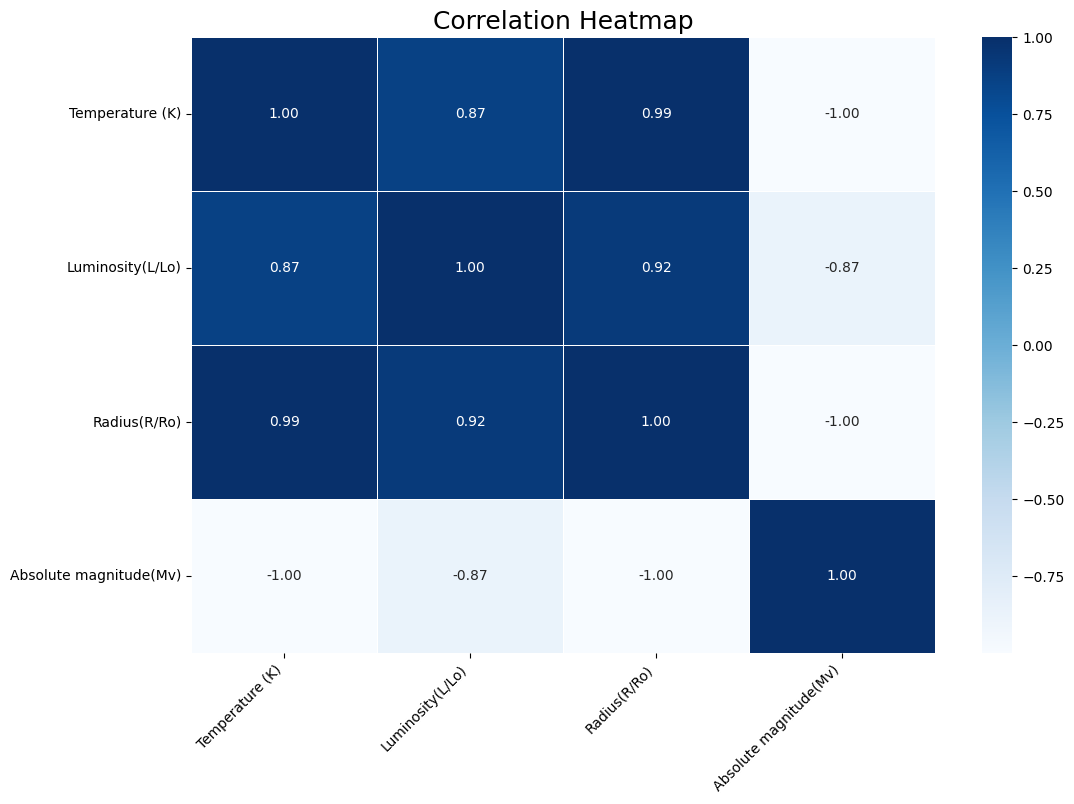

In [50]:
# Filter only numeric columns
numeric_df = input_df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

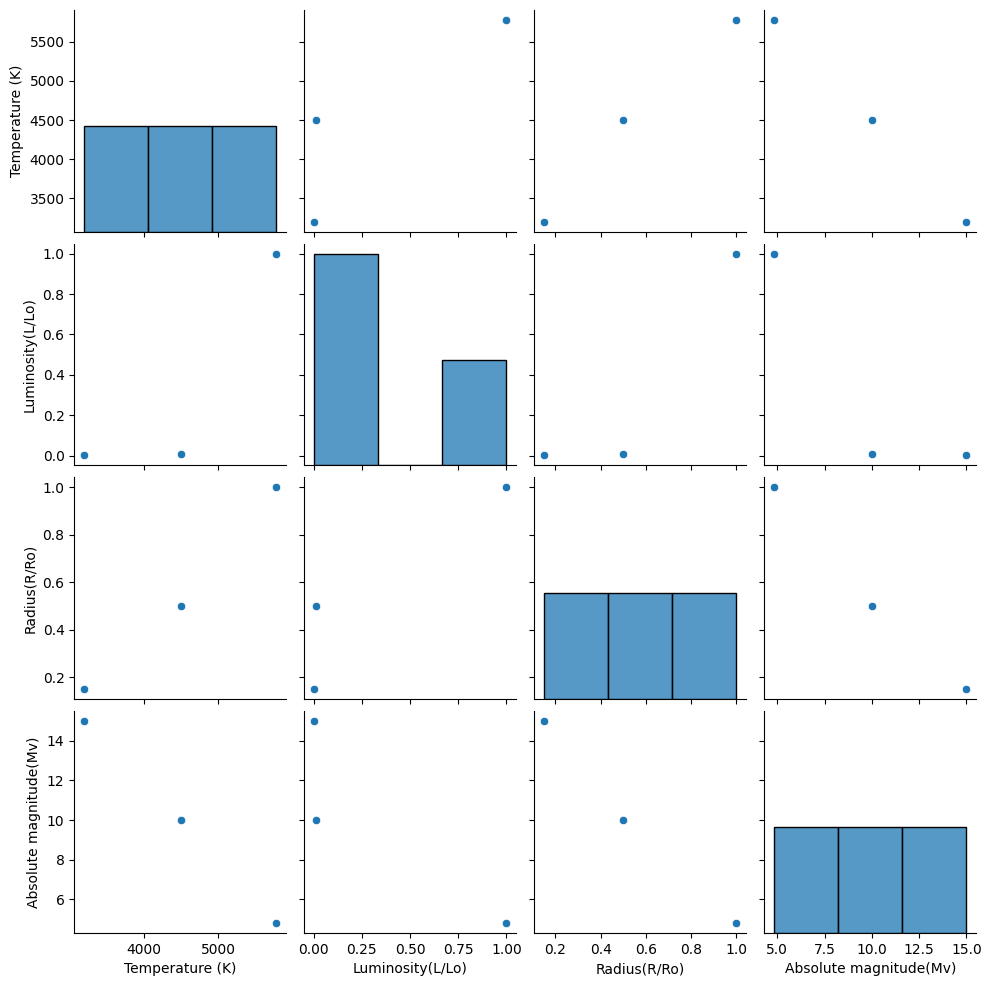

In [51]:
sns.pairplot(input_df, palette='Greens')
plt.show()

In [52]:
!pip install pydantic-settings


In [53]:
!pip install --upgrade pandas-profiling pydantic-settings


In [54]:
pip install -U pandas-profiling

In [55]:
pip install pydantic==1.10.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic-settings 2.3.4 requires pydantic>=2.7.0, but you have pydantic 1.10.9 which is incompatible.
ydata-profiling 4.9.0 requires pydantic>=2, but you have pydantic 1.10.9 which is incompatible.


In [56]:
pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.9
    Uninstalling pydantic-1.10.9:
      Successfully uninstalled pydantic-1.10.9


In [57]:
import pandas as pd
from ydata_profiling import ProfileReport

In [58]:
# Generate the profile report
profile = ProfileReport(input_df, title="Star Data", explorative=True)

# Save the report to an HTML file
profile.to_file("star_data_profile.html")

# Or display the report in a Jupyter notebook
profile.to_notebook_iframe()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning:

Try running command: 'pip install --upgrade Pillow' to avoid ValueError



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **6. Data Preprocessing And Data Modelling**

In [59]:
input_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Color_name,Spectral_Class_name
0,5778,1.000,1.00,4.83,Main Sequence,Yellow,Yellow,G
1,3200,0.001,0.15,15.00,Red Dwarf,Red,Red,M
2,4500,0.010,0.50,10.00,White Dwarf,White,White,D


In [60]:
pip cache purge

Files removed: 92


In [61]:
pip install --upgrade pip

In [62]:
# Getting Feature columns
feature = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color', 'Spectral_Class_name']
X = input_df[feature]

# getting prediction
y = input_df['Star type']

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy of Logistic Regression: 0.9722222222222222


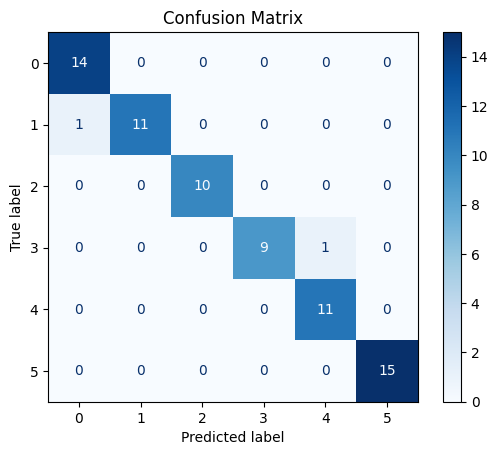

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming input_df is your DataFrame with the provided column names and data
input_df = pd.read_csv('/content/star-repo/input_6_class_csv.csv')

# Select the feature columns and target variable
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
target = 'Star type'  # Assuming this is your target variable

# Encode categorical features if necessary
input_df['Star color'] = input_df['Star color'].astype('category').cat.codes
input_df['Spectral Class'] = input_df['Spectral Class'].astype('category').cat.codes

X = input_df[features]
y = input_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


Decision Tree Classifier

Accuracy of Decision Tree Classifier: 1.0


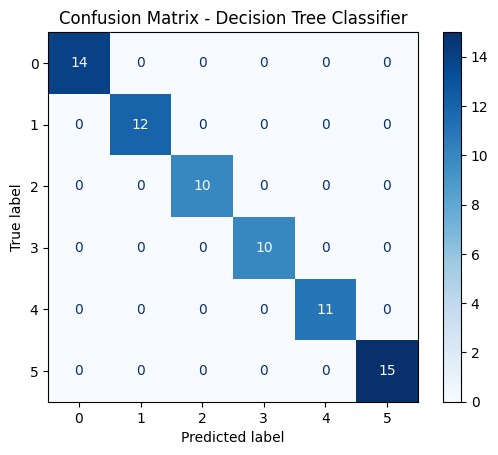

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming input_df is your DataFrame with the provided column names and data
input_df = pd.read_csv('/content/star-repo/input_6_class_csv.csv')

# Select the feature columns and target variable
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
target = 'Star type'  # Assuming this is your target variable

# Encode categorical features if necessary
input_df['Star color'] = input_df['Star color'].astype('category').cat.codes
input_df['Spectral Class'] = input_df['Spectral Class'].astype('category').cat.codes

X = input_df[features]
y = input_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


Support Vector Machine Classifier

Accuracy of Support Vector Machine Classifier: 0.2777777777777778


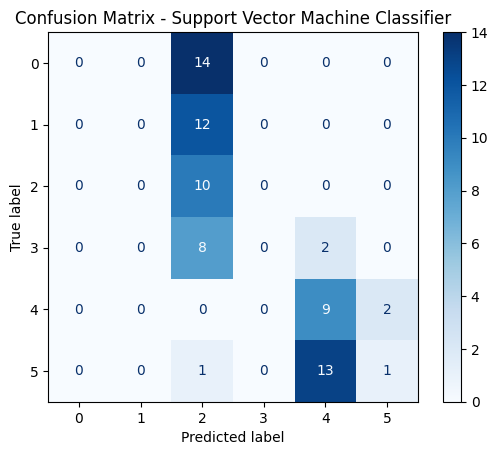

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming input_df is your DataFrame with the provided column names and data
input_df = pd.read_csv('/content/star-repo/input_6_class_csv.csv')

# Select the feature columns and target variable
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
target = 'Star type'  # Assuming this is your target variable

# Encode categorical features if necessary
input_df['Star color'] = input_df['Star color'].astype('category').cat.codes
input_df['Spectral Class'] = input_df['Spectral Class'].astype('category').cat.codes

X = input_df[features]
y = input_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Support Vector Machine Classifier: {accuracy}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Support Vector Machine Classifier')
plt.show()


Random Forest Classifier

Accuracy of Random Forest Classifier: 1.0


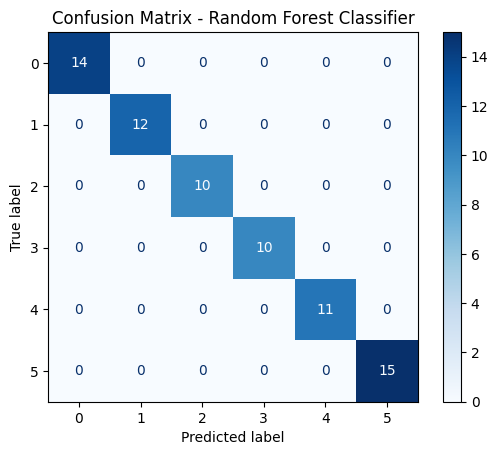

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming input_df is your DataFrame with the provided column names and data
input_df = pd.read_csv('/content/star-repo/input_6_class_csv.csv')

# Select the feature columns and target variable
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
target = 'Star type'  # Assuming this is your target variable

# Encode categorical features if necessary
input_df['Star color'] = input_df['Star color'].astype('category').cat.codes
input_df['Spectral Class'] = input_df['Spectral Class'].astype('category').cat.codes

X = input_df[features]
y = input_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



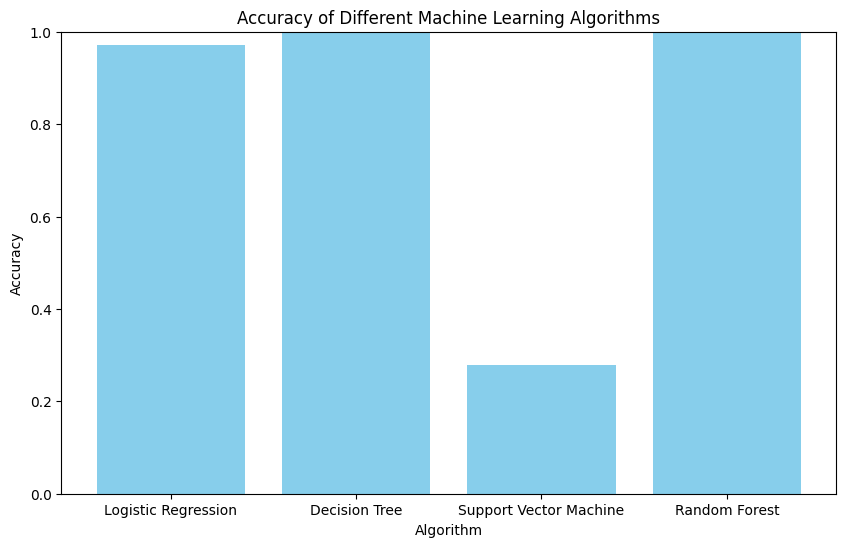

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming input_df is your DataFrame
input_df = pd.read_csv('/content/star-repo/input_6_class_csv.csv')

# Select the feature columns
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
            'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']

# Encode categorical features
input_df['Star color'] = input_df['Star color'].astype('category').cat.codes
input_df['Spectral Class'] = input_df['Spectral Class'].astype('category').cat.codes

X = input_df[features]
y = input_df['Star type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Store the accuracy of each classifier
accuracy_results = {}

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    # Predict
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.ylim(0, 1)
plt.show()
